In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# **Train:**

In [3]:
df = pd.read_csv('Prepared_Train.csv')
df

,date,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2000-01-04,17079,-0.385644,0.643663,-1.181595,-1.510872,-1.319022,-1.320868,-1.713421,-1.407661,...,-1.457308,2.307501,1.591299,2.057370,0.717516,1.906160,1.239922,1.543501,0.129866,2
1,2000-01-04,10001,2.927081,0.800878,0.319408,-0.128330,0.572981,0.572174,-0.297707,-0.270380,...,-0.213661,2.153552,2.162922,2.375407,1.259570,2.289154,2.461635,2.009084,1.257290,0
2,2000-01-04,22047,-0.369334,1.062367,-0.666716,-0.536950,-0.358208,-0.363410,-0.594739,-0.578938,...,-0.527583,1.152884,1.166445,1.012390,0.860700,1.417513,0.889344,1.754693,-0.520221,1
3,2000-01-04,51081,2.330863,0.744729,0.618300,0.100461,0.784301,0.784942,-0.062591,0.039109,...,0.063278,0.548085,0.529163,0.921522,0.078301,1.241424,1.289499,1.322709,0.402630,0
4,2000-01-04,49045,-0.267850,-1.507611,-1.142325,-1.434312,-1.428632,-1.427252,-1.249047,-1.400204,...,-1.474509,0.432623,0.876771,0.255159,0.988543,0.523861,0.241305,0.305147,0.020761,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546113,2016-12-27,45057,-0.385644,0.754355,0.319408,-0.059782,0.596681,0.572174,0.011039,-0.061568,...,-0.079492,-0.601034,-0.305097,-0.418778,-0.116021,-0.193703,-0.229674,0.305147,-0.583865,2
2546114,2016-12-27,47037,2.156891,0.694998,-0.609992,-0.608169,-0.301922,-0.411134,-0.360460,-0.625548,...,-0.623050,-0.425092,0.027062,-0.282476,0.231712,-0.515065,-0.162392,-0.578021,0.343531,1
2546115,2016-12-27,38087,-0.392893,-0.699079,-1.231774,-1.826907,-1.562928,-1.566446,-1.836417,-1.914776,...,-1.888198,1.103400,1.154858,1.428868,0.564104,1.558384,1.608206,1.265111,0.866328,0
2546116,2016-12-27,6053,-0.401954,0.297149,-0.847796,-0.739925,-0.677163,-0.706425,-0.581352,-0.634870,...,-0.847525,-0.667012,-0.872857,-0.471784,-0.837055,-0.959691,-1.114973,-0.808412,-0.670241,4


correlation of columns:

In [4]:
df.corr()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
fips,1.000000,-0.031630,-0.025136,-0.036893,-0.010922,-0.038717,-0.038743,-0.009993,-0.015826,0.012226,-0.000567,0.178540,0.168260,0.140860,0.127652,0.171681,0.178319,0.126379,0.109222,-0.056733
PRECTOT,-0.031630,1.000000,0.089561,0.264132,0.059669,0.242507,0.242517,-0.008721,0.114611,-0.323971,0.053846,0.013557,0.020099,0.007142,0.021793,0.038400,0.040684,0.046776,0.007928,-0.059017
PS,-0.025136,0.089561,1.000000,0.369857,0.221625,0.434118,0.434541,0.172897,0.265516,-0.189930,0.217483,-0.102099,-0.167571,0.018332,-0.234233,-0.051806,-0.110569,0.039797,-0.179640,-0.106192
QV2M,-0.036893,0.264132,0.369857,1.000000,0.821779,0.962487,0.963686,0.747777,0.872215,-0.101883,0.811814,-0.208634,-0.254716,-0.069646,-0.290214,-0.200504,-0.256431,-0.051629,-0.280298,0.021616
T2M,-0.010922,0.059669,0.221625,0.821779,1.000000,0.863616,0.864602,0.984131,0.981989,0.298241,0.997237,-0.158889,-0.183937,-0.065859,-0.199063,-0.161299,-0.176500,-0.073905,-0.156582,0.183459
T2MDEW,-0.038717,0.242507,0.434118,0.962487,0.863616,1.000000,0.999960,0.797686,0.903542,-0.038623,0.852574,-0.222148,-0.269673,-0.073715,-0.307266,-0.198396,-0.253461,-0.050469,-0.277582,0.018576
T2MWET,-0.038743,0.242517,0.434541,0.963686,0.864602,0.999960,1.000000,0.798672,0.904525,-0.038324,0.853612,-0.221718,-0.269166,-0.073653,-0.306636,-0.198210,-0.253167,-0.050520,-0.277157,0.019381
T2M_MAX,-0.009993,-0.008721,0.172897,0.747777,0.984131,0.797686,0.798672,1.000000,0.939751,0.454374,0.980854,-0.163861,-0.181203,-0.079313,-0.186357,-0.160023,-0.161648,-0.092867,-0.119556,0.215055
T2M_MIN,-0.015826,0.114611,0.265516,0.872215,0.981989,0.903542,0.904525,0.939751,1.000000,0.122465,0.978324,-0.163263,-0.195162,-0.058402,-0.218959,-0.171324,-0.201915,-0.060939,-0.201491,0.158874
T2M_RANGE,0.012226,-0.323971,-0.189930,-0.101883,0.298241,-0.038623,-0.038324,0.454374,0.122465,1.000000,0.298277,-0.050288,-0.017509,-0.078076,0.029539,-0.018139,0.056856,-0.110814,0.177951,0.210347


# OLS on Train

Linear Regression on df with all attributes:

In [5]:
X = pd.DataFrame(df[['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']])
y = pd.DataFrame(df[['score']])

X = sm.add_constant(X)

linearModel_1 = sm.OLS(y, X).fit()

linearModel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                 2.183e+04
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:15:52   Log-Likelihood:            -4.7834e+06
No. Observations:             2546118   AIC:                         9.567e+06
Df Residuals:                 2546098   BIC:                         9.567e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7214      0.002   1259.729      0.000       2.717       2.726
fips        -7.417e-06   6.43e-08   -115.371      0.000   -7.54e-06   -7.29e-06
PRECTOT         0.1127      0.001     98.869      0.000       0.110       0.115
PS              0.0054      0.001      4.091      0.000       0.003       0.008
QV2M            0.2187      0.005     45.064      0.000       0.209       0.228
T2M            -4.4595      0.025   -176.244      0.000      -4.509      -4.410
T2MDEW          1.5562      0.141     11.061      0.000       1.280       1.832
T2MWET         -2.7216      0.144    -18.846      0.000      -3.005      -2.439
T2M_MAX         3.5495      2.376      1.494      0.135      -1.107       8.206
T2M_MIN         0.7244      2.133      0.340      0.734      -3.455       4.904
T2M_RANGE      -0.4384      0.818     -0.536      0.592      -2.042       1.166
TS              1.5198      0.015     99.126      0.000       1.490       1.550
WS10M           0.0451      0.007      6.033      0.000       0.030       0.060
WS10M_MAX       4.6180      0.515      8.968      0.000       3.609       5.627
WS10M_MIN      -2.3783      0.263     -9.055      0.000      -2.893      -1.864
WS10M_RANGE    -3.4110      0.389     -8.771      0.000      -4.173      -2.649
WS50M          -0.0013      0.007     -0.194      0.846      -0.015       0.012
WS50M_MAX      -0.6818      0.562     -1.214      0.225      -1.782       0.419
WS50M_MIN       0.4225      0.414      1.020      0.308      -0.390       1.234
WS50M_RANGE     0.4138      0.437      0.946      0.344      -0.444       1.271
==============================================================================
Omnibus:                   557231.866   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105831.320
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                     1.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear Regression on df with attributes that have p-value less than |0.06|:

In [6]:
X = pd.DataFrame(df.drop(['date', 'T2M_MIN', 'T2M_RANGE', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'score'], axis=1))
y = pd.DataFrame(df[['score']])

X = sm.add_constant(X)

linearModel_2 = sm.OLS(y, X).fit()

linearModel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                 2.592e+04
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:16:08   Log-Likelihood:            -4.8059e+06
No. Observations:             2546118   AIC:                         9.612e+06
Df Residuals:                 2546103   BIC:                         9.612e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7266      0.002   1253.026      0.000       2.722       2.731
fips        -7.593e-06   6.47e-08   -117.309      0.000   -7.72e-06   -7.47e-06
PRECTOT         0.0955      0.001     83.559      0.000       0.093       0.098
PS              0.0020      0.001      1.484      0.138      -0.001       0.005
QV2M            0.2794      0.005     57.160      0.000       0.270       0.289
T2M            -0.9438      0.019    -49.434      0.000      -0.981      -0.906
T2MDEW          0.2759      0.142      1.946      0.052      -0.002       0.554
T2MWET         -1.3633      0.146     -9.367      0.000      -1.649      -1.078
T2M_MAX         0.8684      0.008    111.769      0.000       0.853       0.884
TS              1.1015      0.015     71.843      0.000       1.071       1.132
WS10M           0.1591      0.007     24.038      0.000       0.146       0.172
WS10M_MAX       4.8572      0.519      9.350      0.000       3.839       5.875
WS10M_MIN      -2.4766      0.265     -9.347      0.000      -2.996      -1.957
WS10M_RANGE    -3.6664      0.392     -9.345      0.000      -4.435      -2.897
WS50M          -0.2061      0.005    -45.712      0.000      -0.215      -0.197
==============================================================================
Omnibus:                   682070.092   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114139.321
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       1.973   Cond. No.                     2.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear Regression on df with attributes that have corr more than |0.06| 

In [7]:
X = pd.DataFrame(df[['PRECTOT', 'PS', 'T2M', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS']])
y = pd.DataFrame(df[['score']])

X = sm.add_constant(X)

linearModel_3 = sm.OLS(y, X).fit()

linearModel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                 4.024e+04
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:16:25   Log-Likelihood:            -4.8419e+06
No. Observations:             2546118   AIC:                         9.684e+06
Df Residuals:                 2546110   BIC:                         9.684e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5000      0.001   2461.609      0.000       2.498       2.502
PRECTOT        0.0252      0.001     22.780      0.000       0.023       0.027
PS            -0.1905      0.001   -175.540      0.000      -0.193      -0.188
T2M           -6.4195      0.024   -263.265      0.000      -6.467      -6.372
T2M_MAX        2.5528      2.431      1.050      0.294      -2.212       7.318
T2M_MIN        1.7715      2.182      0.812      0.417      -2.505       6.048
T2M_RANGE      0.1259      0.837      0.150      0.880      -1.515       1.767
TS             2.4909      0.014    178.259      0.000       2.464       2.518
==============================================================================
Omnibus:                   818172.785   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119867.617
Skew:                           0.046   Prob(JB):                         0.00
Kurtosis:                       1.941   Cond. No.                     6.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear Regression on df using PCA on attributes

In [9]:
test = pd.read_csv('Prepared_Test.csv')

from sklearn.decomposition import PCA
frames = [df, test]
result = pd.concat(frames)
result

,date,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2000-01-04,17079,-0.385644,0.643663,-1.181595,-1.510872,-1.319022,-1.320868,-1.713421,-1.407661,...,-1.457308,2.307501,1.591299,2.057370,0.717516,1.906160,1.239922,1.543501,0.129866,2
1,2000-01-04,10001,2.927081,0.800878,0.319408,-0.128330,0.572981,0.572174,-0.297707,-0.270380,...,-0.213661,2.153552,2.162922,2.375407,1.259570,2.289154,2.461635,2.009084,1.257290,0
2,2000-01-04,22047,-0.369334,1.062367,-0.666716,-0.536950,-0.358208,-0.363410,-0.594739,-0.578938,...,-0.527583,1.152884,1.166445,1.012390,0.860700,1.417513,0.889344,1.754693,-0.520221,1
3,2000-01-04,51081,2.330863,0.744729,0.618300,0.100461,0.784301,0.784942,-0.062591,0.039109,...,0.063278,0.548085,0.529163,0.921522,0.078301,1.241424,1.289499,1.322709,0.402630,0
4,2000-01-04,49045,-0.267850,-1.507611,-1.142325,-1.434312,-1.428632,-1.427252,-1.249047,-1.400204,...,-1.474509,0.432623,0.876771,0.255159,0.988543,0.523861,0.241305,0.305147,0.020761,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,2020-12-01,56043,-0.244544,-2.410671,-1.132486,-1.385720,-1.445818,-1.235926,-1.560841,-1.342780,...,-1.394249,1.079935,1.331267,0.765354,1.250409,1.068563,0.947595,1.027531,0.241880,3
326336,2020-12-08,56043,-0.442269,-2.383098,-1.239409,-1.045417,-1.737508,-1.203764,-0.895658,-1.015497,...,-1.289604,-0.255802,-0.505451,0.381045,-0.915445,-0.328803,-0.522580,0.395388,-1.033709,3
326337,2020-12-15,56043,-0.419946,-2.530157,-1.241426,-1.637762,-1.736558,-1.519540,-1.568616,-1.513859,...,-1.758268,-0.351614,-0.485786,-0.152282,-0.543270,-0.483058,-0.449799,-0.108351,-0.474483,3
326338,2020-12-22,56043,-0.180761,-2.695599,-1.021527,-1.170073,-1.228238,-1.008840,-1.000187,-1.366954,...,-1.222525,3.001818,3.400033,3.737865,2.005098,2.924157,3.484012,2.963468,1.646877,3


In [14]:
X = pd.DataFrame(result.drop(['date', 'score'], axis=1))
y = pd.DataFrame(result[['score']])

In [37]:
pca = PCA(n_components = 15)
principComp = pca.fit_transform(X)

display(pca.explained_variance_ratio_)

display(np.cumsum(pca.explained_variance_ratio_))

X_pca = pd.DataFrame(principComp)

display(X_pca.corr())

X_pca

array([9.99999928e-01, 3.04185677e-08, 1.94056263e-08, 8.39554315e-09,
       5.99095241e-09, 3.46724005e-09, 2.40378610e-09, 7.88430124e-10,
       5.88251801e-10, 2.94547381e-10, 1.77894937e-10, 1.54985255e-10,
       3.74132454e-11, 2.30777026e-11, 4.65168869e-12])

array([0.99999993, 0.99999996, 0.99999998, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000e+00,-2.554500e-16,-3.953067e-15,-7.162358e-16,8.979137e-16,-1.568449e-16,-2.595384e-18,-3.449488e-15,-1.590266e-15,2.263522e-15,8.767900e-16,-5.330601e-16,-3.534426e-16,-3.629366e-15,-2.698151e-16
1,-2.554500e-16,1.000000e+00,5.113993e-16,2.920428e-17,2.052769e-16,2.401983e-15,1.725121e-15,-1.647878e-15,1.356611e-15,-1.044700e-15,1.688925e-16,-8.378123e-16,2.969384e-16,1.998899e-15,6.730656e-16
2,-3.953067e-15,5.113993e-16,1.000000e+00,-5.316121e-16,-1.549561e-15,-7.614464e-16,5.084455e-16,-1.561949e-15,-6.748917e-17,9.613182e-16,-3.773126e-16,-3.165213e-15,-3.890771e-16,5.744578e-16,6.124099e-17
3,-7.162358e-16,2.920428e-17,-5.316121e-16,1.000000e+00,-5.013674e-15,1.497722e-15,-6.833684e-17,-4.183570e-16,-4.681814e-15,1.921544e-15,-4.778552e-16,-1.176737e-16,7.762082e-16,-6.478596e-17,1.137149e-15
4,8.979137e-16,2.052769e-16,-1.549561e-15,-5.013674e-15,1.000000e+00,-1.887330e-15,-1.751624e-15,4.170756e-15,-5.672273e-16,-1.097895e-15,2.138711e-16,-5.348146e-16,4.946097e-16,-1.121656e-15,6.381693e-16
5,-1.568449e-16,2.401983e-15,-7.614464e-16,1.497722e-15,-1.887330e-15,1.000000e+00,1.253983e-15,-1.248037e-15,-1.309049e-15,-7.563008e-16,1.614035e-16,3.235655e-15,3.576895e-16,1.965199e-15,4.508775e-16
6,-2.595384e-18,1.725121e-15,5.084455e-16,-6.833684e-17,-1.751624e-15,1.253983e-15,1.000000e+00,1.418763e-15,1.519113e-15,5.116228e-16,6.537192e-16,2.324872e-16,-1.535687e-16,-7.560214e-16,2.933060e-17
7,-3.449488e-15,-1.647878e-15,-1.561949e-15,-4.183570e-16,4.170756e-15,-1.248037e-15,1.418763e-15,1.000000e+00,1.746057e-15,-5.675616e-16,1.329230e-15,3.618849e-15,-1.824334e-16,5.969246e-16,1.363029e-15
8,-1.590266e-15,1.356611e-15,-6.748917e-17,-4.681814e-15,-5.672273e-16,-1.309049e-15,1.519113e-15,1.746057e-15,1.000000e+00,3.384440e-16,-1.382147e-16,3.660066e-16,-4.323616e-16,-1.932207e-15,4.256692e-17
9,2.263522e-15,-1.044700e-15,9.613182e-16,1.921544e-15,-1.097895e-15,-7.563008e-16,5.116228e-16,-5.675616e-16,3.384440e-16,1.000000e+00,3.755385e-16,7.108178e-16,4.059986e-16,-9.572516e-16,3.067865e-16


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,12862.052128,5.576328,1.687198,2.096440,-0.175196,-0.897921,-0.353511,0.305701,0.173769,0.471008,-0.452252,-0.036510,-0.085463,-0.030987,-0.035589
1,19940.052111,3.219502,5.429736,1.334476,1.795565,0.621067,1.891952,-0.508117,0.248286,0.261155,0.213042,-0.263167,0.027010,-0.036814,-0.091137
2,7894.052175,2.719559,1.891536,1.371067,-0.556374,-1.015055,0.200490,0.342330,-0.765044,-0.405938,0.071722,-0.094050,-0.013342,-0.057103,-0.018895
3,-21139.947786,-0.020860,2.212456,1.467591,1.469588,0.593304,1.549543,-0.588907,0.228944,-0.457488,0.137957,0.002126,0.038457,-0.097642,-0.036060
4,-19103.947791,3.539989,-1.422466,-0.174896,-0.324858,0.873364,-0.412187,-0.104554,-0.691372,0.121713,0.078975,0.031783,0.263837,0.049307,0.019411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872453,-26101.947827,4.359160,-0.397447,0.276026,-0.085502,1.591927,-1.354947,-0.217617,-0.325131,-0.176241,0.116676,-0.050352,0.038902,-0.071951,-0.048829
2872454,-26101.947733,1.767237,-3.036663,0.620379,-1.797338,1.921415,-0.443558,-0.097455,0.183546,-0.046647,0.070016,0.075213,0.025336,0.256969,-0.072983
2872455,-26101.947732,2.561162,-3.844547,0.396298,-0.762912,1.772019,-0.899822,-0.437965,0.162603,-0.033903,0.024225,0.109032,-0.042172,0.163435,-0.018825
2872456,-26101.947966,6.954033,4.523863,-0.191062,-1.435223,1.745810,-0.233706,-1.252192,0.367304,0.437145,0.757169,-0.231367,0.142380,0.060525,-0.049056


In [38]:
x_pca_train = X_pca[0:2546118]
x_pca_test = X_pca[2546118:]

y_pca_train = y[0:2546118]
y_pca_test = y[2546118:]

display(x_pca_train)
display(x_pca_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,12862.052128,5.576328,1.687198,2.096440,-0.175196,-0.897921,-0.353511,0.305701,0.173769,0.471008,-0.452252,-0.036510,-0.085463,-0.030987,-0.035589
1,19940.052111,3.219502,5.429736,1.334476,1.795565,0.621067,1.891952,-0.508117,0.248286,0.261155,0.213042,-0.263167,0.027010,-0.036814,-0.091137
2,7894.052175,2.719559,1.891536,1.371067,-0.556374,-1.015055,0.200490,0.342330,-0.765044,-0.405938,0.071722,-0.094050,-0.013342,-0.057103,-0.018895
3,-21139.947786,-0.020860,2.212456,1.467591,1.469588,0.593304,1.549543,-0.588907,0.228944,-0.457488,0.137957,0.002126,0.038457,-0.097642,-0.036060
4,-19103.947791,3.539989,-1.422466,-0.174896,-0.324858,0.873364,-0.412187,-0.104554,-0.691372,0.121713,0.078975,0.031783,0.263837,0.049307,0.019411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546113,-15115.947718,-1.212190,-0.566384,0.516502,-0.128518,-0.730953,0.130214,-0.467313,-0.675207,-0.438577,0.286485,-0.109043,0.023601,-0.000956,0.029396
2546114,-17095.947728,0.312130,-1.375149,-0.032909,1.455367,0.392906,2.087748,0.276520,-0.281574,0.381059,0.311858,-0.225378,0.124207,0.112766,0.045058
2546115,-8145.947850,5.483433,0.070667,0.783393,-0.325431,-0.023882,-0.029525,-0.795046,0.436355,-0.083710,0.107718,0.206841,0.162538,-0.069751,-0.057533
2546116,23888.052295,0.624793,-2.472747,0.403894,-0.464925,-0.426102,0.157251,0.290720,0.042670,0.306863,-0.127286,-0.178859,0.008853,0.190049,0.004808


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2546118,28940.052333,-2.050306,-1.729979,1.046743,0.454674,-0.453501,-0.509315,0.142436,0.358918,-0.116916,-0.059614,-0.192847,-0.010293,-0.097287,-0.028739
2546119,28940.052277,-0.686635,-0.059718,0.876204,-0.640989,-0.627872,0.069170,-0.174772,-0.064016,-0.467631,0.052849,-0.090071,0.097769,0.033901,0.067703
2546120,28940.052305,0.431242,-2.626880,1.479974,-0.550984,-0.699135,0.024074,0.534361,-0.051802,-0.027519,0.067381,-0.096573,0.046194,0.040892,0.044992
2546121,28940.052227,1.800955,0.190939,0.889095,-1.316142,-0.844029,1.025225,-0.410201,-0.066416,-0.378546,-0.017091,0.005233,-0.119532,-0.090462,-0.008657
2546122,28940.052247,2.120136,-1.084618,0.816210,-0.257248,-0.335510,1.216020,0.070051,-0.487434,-0.135305,-0.047940,0.013777,-0.006556,-0.151167,-0.035211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872453,-26101.947827,4.359160,-0.397447,0.276026,-0.085502,1.591927,-1.354947,-0.217617,-0.325131,-0.176241,0.116676,-0.050352,0.038902,-0.071951,-0.048829
2872454,-26101.947733,1.767237,-3.036663,0.620379,-1.797338,1.921415,-0.443558,-0.097455,0.183546,-0.046647,0.070016,0.075213,0.025336,0.256969,-0.072983
2872455,-26101.947732,2.561162,-3.844547,0.396298,-0.762912,1.772019,-0.899822,-0.437965,0.162603,-0.033903,0.024225,0.109032,-0.042172,0.163435,-0.018825
2872456,-26101.947966,6.954033,4.523863,-0.191062,-1.435223,1.745810,-0.233706,-1.252192,0.367304,0.437145,0.757169,-0.231367,0.142380,0.060525,-0.049056


In [39]:
x_pca_train = sm.add_constant(x_pca_train)

linearModel_4 = sm.OLS(y_pca_train, x_pca_train).fit()

linearModel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                 2.762e+04
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:58:00   Log-Likelihood:            -4.7836e+06
No. Observations:             2546118   AIC:                         9.567e+06
Df Residuals:                 2546102   BIC:                         9.567e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4993      0.001   2517.936      0.000       2.497       2.501
0           6.351e-06   6.28e-08    101.158      0.000    6.23e-06    6.47e-06
1             -0.0538      0.000   -147.991      0.000      -0.054      -0.053
2              0.0536      0.000    118.310      0.000       0.053       0.054
3             -0.2340      0.001   -340.206      0.000      -0.235      -0.233
4             -0.1860      0.001   -228.360      0.000      -0.188      -0.184
5              0.1600      0.001    148.882      0.000       0.158       0.162
6              0.0501      0.001     38.827      0.000       0.048       0.053
7              0.7128      0.002    318.581      0.000       0.708       0.717
8              0.1198      0.003     46.103      0.000       0.115       0.125
9              0.1649      0.004     44.551      0.000       0.158       0.172
10            -0.0343      0.005     -7.232      0.000      -0.044      -0.025
11             0.7029      0.005    137.692      0.000       0.693       0.713
12             0.4214      0.010     40.870      0.000       0.401       0.442
13             1.2384      0.013     94.565      0.000       1.213       1.264
14             5.3378      0.029    181.738      0.000       5.280       5.395
==============================================================================
Omnibus:                   562359.652   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106168.595
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                       2.008   Cond. No.                     4.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Test:**

In [40]:
test = pd.read_csv('Prepared_Test.csv')
test

,date,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2019-01-01,1001,-0.083493,0.706985,0.301901,0.172940,0.561810,0.569065,-0.092256,0.303861,...,0.159317,-1.298466,-1.429709,-0.850312,-1.318635,-1.231647,-1.355922,-0.898529,-0.881193,0
1,2019-01-08,1001,-0.434297,0.718014,0.112263,0.030995,0.415490,0.418974,0.137535,0.158815,...,0.018002,-0.661595,-0.682436,-0.152282,-0.796556,-0.147327,-0.446160,0.306493,-0.848841,0
2,2019-01-15,1001,-0.442269,0.809927,-0.837942,-0.809753,-0.636306,-0.655054,-0.781627,-0.616622,...,-0.799475,-0.999757,-1.075738,-0.403259,-1.148054,-0.986654,-1.312254,-0.325650,-1.357228,0
3,2019-01-22,1001,-0.437486,0.822794,-0.652339,-0.616854,-0.363618,-0.448435,-0.519873,-0.863013,...,-0.605392,0.099267,-0.222274,0.483004,-0.615637,0.542282,0.299845,0.968267,-0.525322,0
4,2019-01-29,1001,0.480983,0.679411,-0.908552,-0.962616,-0.764574,-0.849003,-0.960449,-1.194015,...,-0.954206,-0.227622,-0.241939,-0.128753,-0.233123,0.074981,-0.282403,0.271923,-0.617756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,2020-12-01,56043,-0.244544,-2.410671,-1.132486,-1.385720,-1.445818,-1.235926,-1.560841,-1.342780,...,-1.394249,1.079935,1.331267,0.765354,1.250409,1.068563,0.947595,1.027531,0.241880,3
326336,2020-12-08,56043,-0.442269,-2.383098,-1.239409,-1.045417,-1.737508,-1.203764,-0.895658,-1.015497,...,-1.289604,-0.255802,-0.505451,0.381045,-0.915445,-0.328803,-0.522580,0.395388,-1.033709,3
326337,2020-12-15,56043,-0.419946,-2.530157,-1.241426,-1.637762,-1.736558,-1.519540,-1.568616,-1.513859,...,-1.758268,-0.351614,-0.485786,-0.152282,-0.543270,-0.483058,-0.449799,-0.108351,-0.474483,3
326338,2020-12-22,56043,-0.180761,-2.695599,-1.021527,-1.170073,-1.228238,-1.008840,-1.000187,-1.366954,...,-1.222525,3.001818,3.400033,3.737865,2.005098,2.924157,3.484012,2.963468,1.646877,3


# OLS Prediction result on Test

Linear Regression with all attributes:

In [41]:
X_test_1 = pd.DataFrame(test[['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']])
X_test_1 = sm.add_constant(X_test_1)

y_test_1 = pd.DataFrame(test[['score']])

In [42]:
y_predict_1 = linearModel_1.predict(X_test_1)

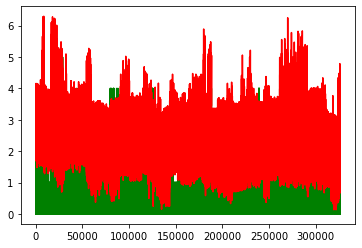

In [43]:
from matplotlib import pyplot
pyplot.plot(y_test_1,color='green')
pyplot.plot(y_predict_1, color='red')
pyplot.show()

Linear Regression with attributes that have p-value less than |0.06|:

In [44]:
X_test_2 = pd.DataFrame(test.drop(['date', 'T2M_MIN', 'T2M_RANGE', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'score'], axis=1))
X_test_2 = sm.add_constant(X_test_2)

y_test_2 = pd.DataFrame(test[['score']])

In [45]:
y_predict_2 = linearModel_2.predict(X_test_2)

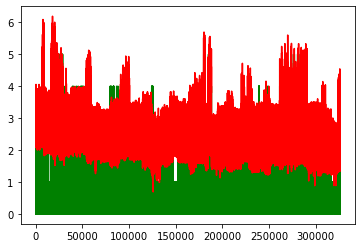

In [46]:
pyplot.plot(y_test_2,color='green')
pyplot.plot(y_predict_2, color='red')
pyplot.show()

Linear Regression with attributes that have corr more than |0.06| 

In [47]:
X_test_3 = pd.DataFrame(test[['PRECTOT', 'PS', 'T2M', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS']])
X_test_3 = sm.add_constant(X_test_3)

y_test_3 = pd.DataFrame(test[['score']])

In [48]:
y_predict_3 = linearModel_3.predict(X_test_3)

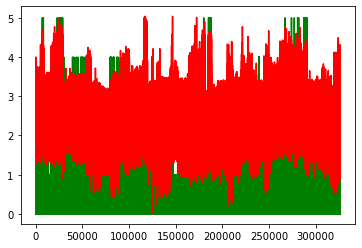

In [49]:
pyplot.plot(y_test_3,color='green')
pyplot.plot(y_predict_3, color='red')
pyplot.show()

Linear Regression using PCA on attributes

In [50]:
x_pca_test = sm.add_constant(x_pca_test)

In [51]:
y_predict_4 = linearModel_4.predict(x_pca_test)

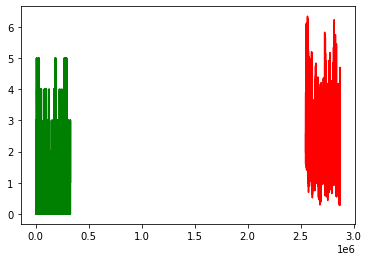

In [52]:
pyplot.plot(y_pca_test,color='green')
pyplot.plot(y_predict_4, color='red')
pyplot.show()